In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Memuat data
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
# Menggabungkan data ratings dengan data movies
movie_ratings = pd.merge(ratings, movies, on='movieId')

In [6]:
# Analisis deskriptif awal
print("Analisis Deskriptif Awal")
print(movie_ratings.describe())

Analisis Deskriptif Awal
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


In [7]:
# Menghitung rata-rata rating dan jumlah rating per film
mean_ratings = movie_ratings.groupby('title')['rating'].mean()
rating_counts = movie_ratings.groupby('title')['rating'].count()

In [8]:
# Menggabungkan hasil ke dalam satu DataFrame
ratings_summary = pd.DataFrame({
    'mean_rating': mean_ratings,
    'rating_count': rating_counts
})

In [9]:
# Mengambil film dengan jumlah rating yang cukup banyak
popular_movies = ratings_summary[ratings_summary['rating_count'] > 100]

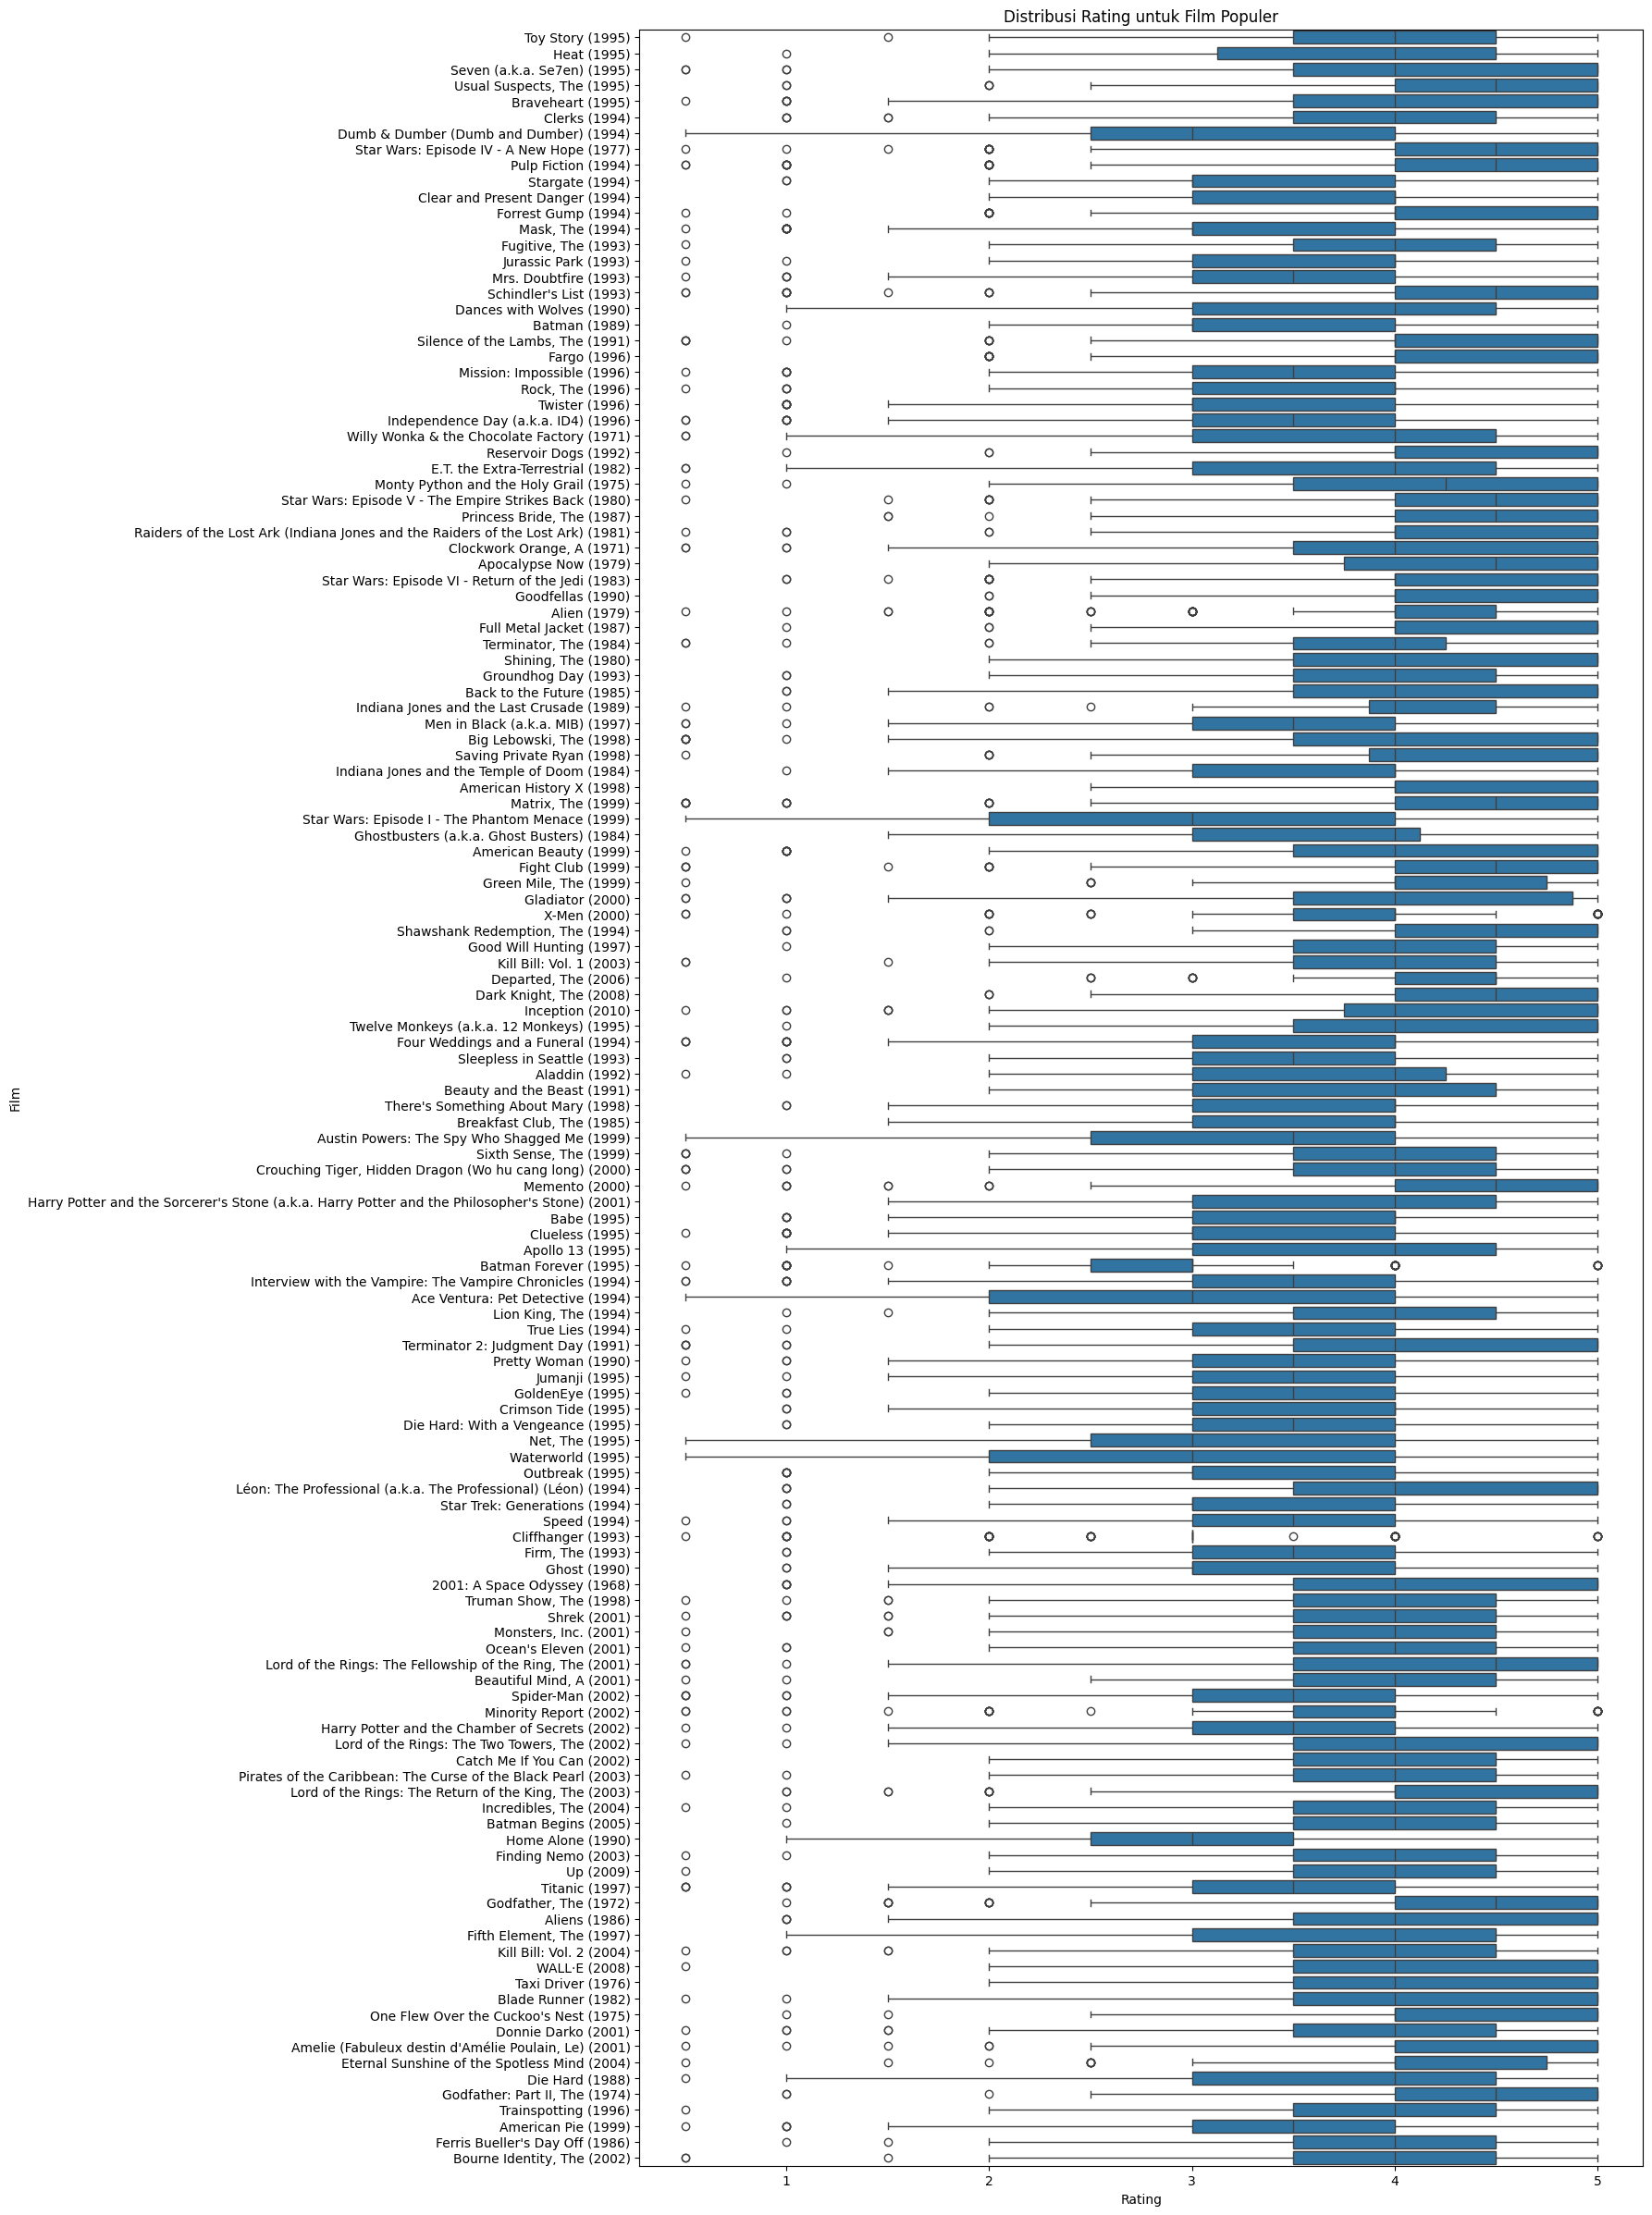

In [10]:
# Boxplot untuk distribusi rating film populer
plt.figure(figsize=(14, 30))
sns.boxplot(x='rating', y='title', data=movie_ratings[movie_ratings['title'].isin(popular_movies.index)])
plt.title('Distribusi Rating untuk Film Populer')
plt.xlabel('Rating')
plt.ylabel('Film')
plt.show()

In [11]:
# Analisis korelasi
print("Korelasi antara Jumlah Rating dan Rata-rata Rating")
print(popular_movies.corr())

Korelasi antara Jumlah Rating dan Rata-rata Rating
              mean_rating  rating_count
mean_rating      1.000000      0.361708
rating_count     0.361708      1.000000


In [12]:
# Simulasi Monte Carlo
np.random.seed(42)
def monte_carlo_simulation(movie, num_simulations=1000):
    # Memeriksa apakah film ada di DataFrame popular_movies sebelum melanjutkan
    if movie in popular_movies.index:
        mean = popular_movies.loc[movie]['mean_rating']
        std_dev = movie_ratings[movie_ratings['title'] == movie]['rating'].std()
        simulations = np.random.normal(mean, std_dev, num_simulations)
        return simulations
    else:
        print(f"Movie '{movie}' not found in the list of popular movies.")
        return None

In [13]:
# Memilih film untuk simulasi
selected_movie = 'Toy Story (1995)'
simulations = monte_carlo_simulation(selected_movie)


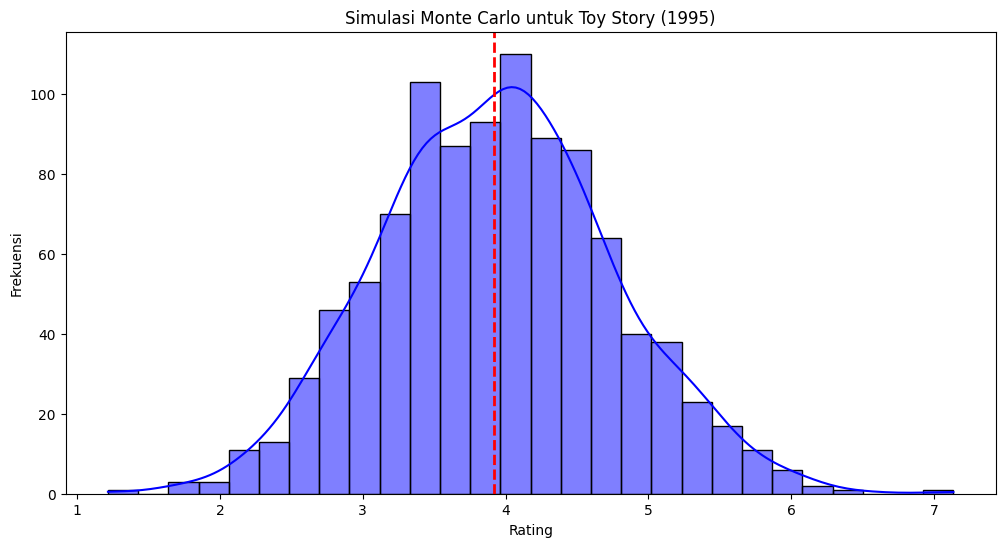

In [14]:
# Visualisasi hasil simulasi
plt.figure(figsize=(12, 6))
sns.histplot(simulations, kde=True, color='blue')
plt.axvline(popular_movies.loc[selected_movie]['mean_rating'], color='red', linestyle='dashed', linewidth=2)
plt.title(f'Simulasi Monte Carlo untuk {selected_movie}')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()


In [15]:
# Statistik ringkasan hasil simulasi
print(f"Statistik Ringkasan untuk Simulasi Monte Carlo pada {selected_movie}:")
print(f"Mean: {np.mean(simulations)}")
print(f"Standard Deviation: {np.std(simulations)}")
print(f"Min: {np.min(simulations)}")
print(f"Max: {np.max(simulations)}")

Statistik Ringkasan untuk Simulasi Monte Carlo pada Toy Story (1995):
Mean: 3.9370697760701514
Standard Deviation: 0.817098520791688
Min: 1.2149285662121336
Max: 7.137418334237909
